<a href="https://colab.research.google.com/github/Sudhakathir16/sql-asignment/blob/main/deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, Adadelta, RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv("/content/Churn_Modelling.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.iloc[:,3].value_counts()

,count
CreditScore,
850,233
678,63
655,54
705,53
667,53
...,...
358,1
412,1
382,1


In [ ]:
df.shape

(10000, 14)

In [ ]:
# Drop the columns, correcting the typo in 'Surname'
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [ ]:
df=pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [ ]:
X=df.drop('Exited',axis=1)
y=df['Exited']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler=StandardScaler()
X_train_scaler=scaler.fit_transform(X_train)
X_test_scaler=scaler.transform(X_test)

In [ ]:
def create_model(optimizer):
    model = Sequential()
    model.add(Dense(128, activation='relu',kernel_initializer='he_normal', input_shape=(X_train_scaler.shape[1],)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(64, activation='relu',kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(32, activation='relu',kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(2, activation='softmax'))

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
optimizers ={
    'SGD': SGD(learning_rate=0.01),
    "SGD with momentum": SGD(learning_rate=0.01, momentum=0.9),
    "NAG": SGD(learning_rate=0.01,momentum=0.9, nesterov=True),
    'Adagrad': Adagrad(learning_rate=0.01),
    "Adadelta": Adadelta(learning_rate=1.0),
    'RMSprop': RMSprop(learning_rate=0.001),
    'Adam': Adam(learning_rate=0.001),
}

histories={}

for name, opt in optimizers.items():
    print(f"Training with optimizer:{name}")
    # Create a new model instance for the current optimizer
    model = create_model(opt)
    # Correct the variable name for the scaled training data
    history = model.fit(X_train_scaler, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
    histories[name]=history

Training with optimizer:SGD


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with optimizer:SGD with momentum
Training with optimizer:NAG
Training with optimizer:Adagrad
Training with optimizer:Adadelta
Training with optimizer:RMSprop
Training with optimizer:Adam


In [ ]:
for name, hist in histories.items():
  print(f"\n{name} final validation accuracy:{hist.history['val_accuracy'][-1]:.4f}")



SGD final validation accuracy:0.8350

SGD with momentum final validation accuracy:0.8544

NAG final validation accuracy:0.8550

Adagrad final validation accuracy:0.8462

Adadelta final validation accuracy:0.8512

RMSprop final validation accuracy:0.8562

Adam final validation accuracy:0.8562


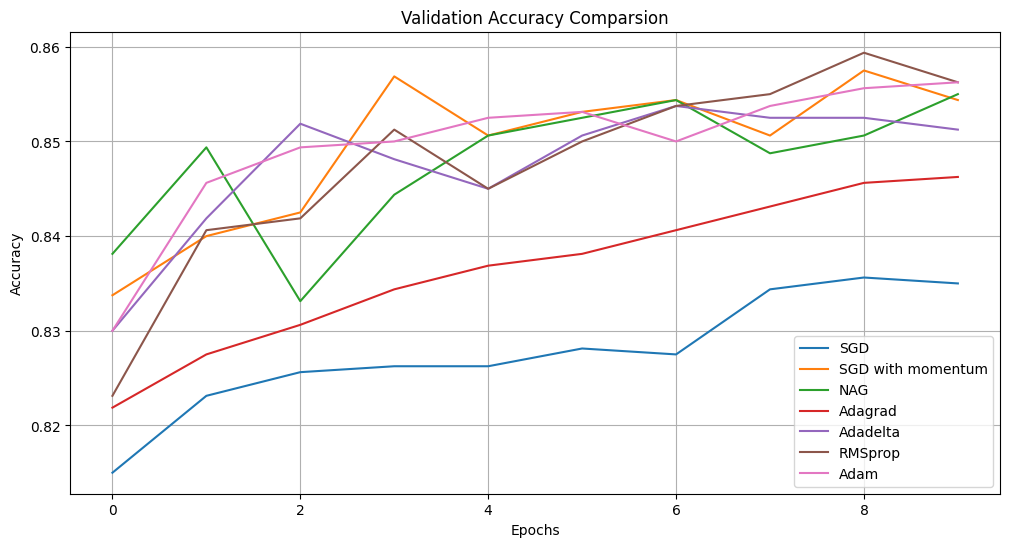

In [ ]:
plt.figure(figsize=(12,6))
for name, hist in histories.items():
    plt.plot(hist.history['val_accuracy'],label=name)
plt.title('Validation Accuracy Comparsion')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model_gc = create_model(Adam(learning_rate=0.001, clipvalue=1.0))
history_gc = model_gc.fit(X_train_scaler, y_train, epochs=10, batch_size=32,
                          validation_split=0.2, verbose=0)
print("model with Gradient Clippingv- Final Val Accuracy:", history_gc.history['val_accuracy'][-1])

model with Gradient Clippingv- Final Val Accuracy: 0.8506249785423279
